<a href="https://colab.research.google.com/github/tangshuting/daytoy/blob/master/cleverhans_BIM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install git+https://github.com/tensorflow/cleverhans.git#egg=cleverhans

  Cloning https://github.com/tensorflow/cleverhans.git to /tmp/pip-install-z3u_vvso/cleverhans
  Running command git clone -q https://github.com/tensorflow/cleverhans.git /tmp/pip-install-z3u_vvso/cleverhans
     |████████████████████████████████| 163kB 4.6MB/s 
     |████████████████████████████████| 51kB 6.5MB/s 
  Created wheel for cleverhans: filename=cleverhans-3.0.1-cp36-none-any.whl size=262573 sha256=fddaa45e45a9b65e493c3a96f3ab52af00ba87cba603eac9c25fc710077742bf
  Stored in directory: /tmp/pip-ephem-wheel-cache-vbbm2chf/wheels/6e/59/ec/723a6f654aaf62c8c40f0f0850fdf71a4948598697f56c3bfa
Successfully built cleverhans


In [ ]:
import cleverhans
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import pickle
from google.colab import drive
drive.mount('/content/drive')
f = open(r'/content/drive/My Drive/EMW/2016.04C.multisnr.pkl','rb') #open的参数是pkl文件的路径
Xd = pickle.load(f,encoding='bytes')
print(type(Xd))   # dict
print(len(Xd))  # 220   =11（类别）×20（20个snr）
# 取出SNR和调制方式
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])  # set()创建一个无序的不重复元素序列
X = []
lbl = []
for mod in mods:
    for snr in snrs:
        X.append(Xd[(mod,snr)])
        for i in range(Xd[(mod,snr)].shape[0]):  lbl.append((mod,snr)) # append末尾添加对象
X = np.vstack(X)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
<class 'dict'>
220


In [ ]:
print(mods)
mods_str = []
for i in mods:
  mods_str.append(str(i).split('\'')[1])
print(mods_str)

print(snrs)

[b'8PSK', b'AM-DSB', b'AM-SSB', b'BPSK', b'CPFSK', b'GFSK', b'PAM4', b'QAM16', b'QAM64', b'QPSK', b'WBFM']
['8PSK', 'AM-DSB', 'AM-SSB', 'BPSK', 'CPFSK', 'GFSK', 'PAM4', 'QAM16', 'QAM64', 'QPSK', 'WBFM']
[-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


In [ ]:
# from sklearn.model_selection import train_test_split
# xTrain, xTest, yTrain, yTest = train_test_split(data,labels, test_size=0.5, random_state=1)
np.random.seed(2016)
n_examples = X.shape[0]  # int 162060
n_train = n_examples * 0.5
train_idx = np.random.choice(range(0,n_examples), size= int(n_train), replace=False)  # ndarray with shape (81030,)
test_idx = list(set(range(0,n_examples))-set(train_idx))   # list (81030 items total)

X_train = X[train_idx]  # ndarray with shape (81030, 2, 128)
X_test =  X[test_idx]   # 同上
# print(X_train.shape)

In [ ]:
# print(lbl.shape) # AttributeError: 'list' object has no attribute 'shape' 解决办法是使用vstack函数
# lbl:list,包括[(b'8PSK', -20), (b'8PSK', -20), (b'8PSK', -20), (b'8PSK', -20), (b'8PSK', -20), ...] (162060 items total)
lbl_no = np.vstack(lbl)  # 这一步骤没必要，因为可以直接使用lbl去取出来调制方式
print(lbl_no)  # ndarray with shape (162060, 2)  有162060个这样的数据[b'8PSK' b'-20']

lbl_mods = lbl_no[0]
print(lbl_mods)
# 没有经过onehot编码的y，但是显示的不是调制类型，而是对应的数字

Y_train_no = list(map(lambda x: mods.index(lbl[x][0]), train_idx))  # 显示的是0-10数字表示调制方式list (81030 items total)
print(Y_train_no)  
Y_train_no = np.vstack(Y_train_no)  # # ndarray with shape (81030, 1)

Y_test_no = list(map(lambda x: mods.index(lbl[x][0]), test_idx))  
Y_test_no = np.vstack(Y_test_no)
print(Y_test_no[1]) 

Y_train_mod = lbl_no[:,0]
Y_train_mod_vsatck = np.vstack(Y_train_mod)  # 字幕显示调制方式
print(Y_train_mod_vsatck)

Y_train_snrs = list(map(lambda x: snrs.index(lbl[x][1]), train_idx))
# print(Y_train_snrs)
Y_train_snrs = np.vstack(Y_train_snrs)  
Y_test_snrs = list(map(lambda x: snrs.index(lbl[x][1]), test_idx))
print(Y_test_snrs[1])
Y_test_snrs = np.vstack(Y_test_snrs) 

[[b'8PSK' b'-20']
 [b'8PSK' b'-20']
 [b'8PSK' b'-20']
 ...
 [b'WBFM' b'18']
 [b'WBFM' b'18']
 [b'WBFM' b'18']]
[b'8PSK' b'-20']
[5, 10, 7, 9, 7, 8, 10, 4, 9, 4, 5, 6, 6, 6, 3, 4, 5, 5, 6, 4, 7, 4, 4, 2, 3, 10, 6, 10, 8, 6, 2, 1, 5, 0, 5, 5, 2, 4, 8, 4, 4, 1, 1, 5, 9, 6, 4, 3, 5, 9, 10, 4, 3, 5, 5, 3, 4, 4, 2, 5, 1, 2, 6, 9, 4, 8, 3, 4, 4, 3, 6, 10, 1, 6, 3, 5, 4, 6, 5, 3, 3, 9, 6, 4, 1, 10, 3, 7, 8, 2, 9, 10, 6, 10, 5, 9, 9, 5, 3, 9, 5, 10, 3, 6, 5, 4, 4, 2, 0, 1, 3, 1, 1, 4, 3, 6, 5, 4, 4, 5, 9, 0, 9, 1, 3, 10, 9, 10, 10, 10, 6, 10, 9, 5, 4, 9, 5, 1, 2, 1, 3, 5, 5, 1, 1, 6, 3, 1, 9, 4, 5, 5, 5, 2, 7, 9, 4, 2, 0, 0, 3, 10, 4, 3, 3, 3, 9, 9, 4, 5, 9, 4, 2, 2, 5, 3, 3, 10, 0, 6, 10, 2, 3, 4, 4, 5, 2, 3, 6, 10, 9, 10, 3, 9, 3, 2, 4, 5, 1, 5, 4, 10, 5, 9, 3, 8, 3, 3, 5, 2, 4, 10, 4, 4, 10, 5, 4, 4, 6, 9, 6, 2, 0, 5, 8, 3, 1, 1, 7, 5, 3, 5, 7, 3, 0, 5, 5, 5, 1, 5, 1, 5, 3, 10, 2, 2, 3, 3, 7, 10, 1, 3, 5, 3, 4, 9, 3, 4, 1, 10, 3, 4, 2, 2, 3, 5, 1, 4, 5, 3, 3, 3, 7, 5, 0, 5, 0, 7, 3, 3, 2, 4,

In [ ]:
Y_snrs = lbl_no[:,1]  # ndarray with shape (162060,) [b'-20' b'-20' b'-20' ... b'18' b'18' b'18']
Y_mods = lbl_no[:,0]  # ndarray with shape (162060,) [b'8PSK' b'8PSK' b'8PSK' ... b'WBFM' b'WBFM' b'WBFM']

In [ ]:
def to_onehot(yy):
    yy1 = np.zeros([len(yy), max(yy)+1])
    yy1[np.arange(len(yy)),yy] = 1
    return yy1
Y_train = to_onehot(list(map(lambda x: mods.index(lbl[x][0]), train_idx)))
Y_test = to_onehot(list(map(lambda x: mods.index(lbl[x][0]), test_idx)))  # ndarray with shape (81030, 11)
print(Y_test[1])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
in_shp = list(X_train.shape[1:])   # list [2, 128]

classes = mods  # list [b'8PSK', b'AM-DSB', b'AM-SSB', b'BPSK', b'CPFSK', b'GFSK', b'PAM4', b'QAM16', b'QAM64', b'QPSK', b'WBFM'] (11 items total)

mods_str = []
for i in mods:
  mods_str.append(str(i).split('\'')[1])
print(mods_str)   # list ['8PSK', 'AM-DSB', 'AM-SSB', 'BPSK', 'CPFSK', 'GFSK', 'PAM4', 'QAM16', 'QAM64', 'QPSK', 'WBFM']
# print(Y_train[1])  # [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
# print(Y_train.shape)  # ndarray with shape (81030, 11)

['8PSK', 'AM-DSB', 'AM-SSB', 'BPSK', 'CPFSK', 'GFSK', 'PAM4', 'QAM16', 'QAM64', 'QPSK', 'WBFM']


In [ ]:
num_classes = 11

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=in_shp),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(135,activation=tf.nn.relu),
    tf.keras.layers.Dense(11),
    tf.keras.layers.Activation(tf.nn.softmax) # We seperate the activation layer to be able to access the logits of the previous layer later
])

model.compile(optimizer='adam',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

nb_epoch = 100    # number of epochs to train on
batch_size = 1024  # training batch size
model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=2, validation_split=0.2)
# model.fit(X_train, Y_train,  epochs=nb_epoch, verbose=2, validation_split=0.2)

test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2, 128)            16512     
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 135)               69255     
_________________________________________________________________
dense_3 (Dense)              (None, 11)                1496      
_________________________________________________________________
activation (Activation)      (None, 11)                0

In [ ]:
# Import the attack
from cleverhans.future.tf2.attacks import basic_iterative_method
from cleverhans.future.tf2.attacks import projected_gradient_descent
#The attack requires the model to ouput the logits
logits_model = tf.keras.Model(model.input,model.layers[-1].output)

In [ ]:
random_index = 6000
print(Y_test[random_index],Y_test_no[random_index],Y_test_snrs[random_index])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0] [15]


In [ ]:
# 现在是随机选择一个无线电信号，后面重新固定SNR和调制方式进行选择
# random_index = np.random.randint(X_test.shape[0])
# print(lbl_no[random_index])
original_image = X_test[random_index] # EagerTensor with shape (1, 2, 128)
original_image = tf.convert_to_tensor(original_image.reshape((1,2,128))) #The .reshape just gives it the proper form to input into the model, a batch of 1 a.k.a a tensor

original_label = Y_test_no[random_index]
original_label = np.reshape(original_label, (1,)).astype('int64')

In [ ]:
#fast_gradient_method(model_fn, x, eps, norm, clip_min=None, clip_max=None, y=None, targeted=False, sanity_checks=False)
# adv_example_untargeted_label = fast_gradient_method(logits_model, original_image, epsilon, np.inf, targeted=False)
#basic_iterative_method(model_fn, x, eps, eps_iter, nb_iter, norm, clip_min=None, clip_max=None, y=None, targeted=False,rand_init=None, rand_minmax=0.3, sanity_checks=True):
#momentum_iterative_method(model_fn, x, eps=0.3, eps_iter=0.06, nb_iter=10, norm=np.inf,clip_min=None, clip_max=None, y=None, targeted=False,decay_factor=1.0, sanity_checks=True): 

9 [[3.7483239e-01 1.6933845e-18 1.6082339e-12 2.6509045e-03 4.6225668e-07
  8.6250070e-12 4.8586653e-08 4.4870541e-07 3.2270051e-10 6.2251574e-01
  1.0481071e-17]]
9 [[4.7329396e-01 2.9234223e-18 3.5687286e-12 2.6671120e-03 8.3947805e-07
  2.1432762e-11 4.7001414e-08 5.2065212e-07 6.3805461e-10 5.2403760e-01
  1.8793065e-17]]
[0.04999999 0.04999997]


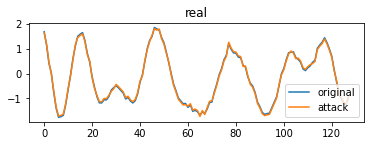

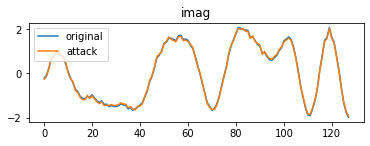

In [ ]:
from cleverhans.future.tf2.attacks import fast_gradient_method
epsilon = 0.05

adv_example_untargeted_label_FGSM = fast_gradient_method(logits_model, original_image, epsilon, np.inf, targeted=False)  # EagerTensor with shape (1, 2, 128)
example_untargeted_pred = model.predict(original_image) 
adv_example_untargeted_label_pred_FGSM = model.predict(adv_example_untargeted_label_FGSM)  # ndarray with shape (1, 11) 给出了11个概率

original = np.argmax(example_untargeted_pred)
attack = np.argmax(adv_example_untargeted_label_pred_FGSM)
print(np.argmax(example_untargeted_pred),example_untargeted_pred)
print(np.argmax(adv_example_untargeted_label_pred_FGSM),adv_example_untargeted_label_pred_FGSM)

original_image_plt = np.reshape(original_image, (2,128))
real = original_image_plt[0]  #取（2，128）的行
imag = original_image_plt[1]

adv_example_untargeted_label_FGSM_plt = np.reshape(adv_example_untargeted_label_FGSM, (2,128))
real_adv = adv_example_untargeted_label_FGSM_plt[0]  #取（2，128）的行
imag_adv = adv_example_untargeted_label_FGSM_plt[1]

plt.figure()
# plt.suptitle('mods={},SNR={},attack={}'.format(np.argmax(example_untargeted_pred)),-10dB,np.argmax(adv_example_untargeted_label_pred)))
plt.subplot(2,1,1)
plt.plot(real,label='original')
plt.plot(real_adv,label='attack')
plt.title("real")
plt.legend()  #设置 legend 图例
plt.figure()
plt.subplot(2,1,2)
plt.plot(imag,label='original')
plt.plot(imag_adv,label='attack')
plt.title("imag")
plt.legend()  #设置 legend 图例

x1 = original_image_plt
x2_FGSM = adv_example_untargeted_label_FGSM_plt
x1_2 = x1 - x2_FGSM
x1_2_2 = np.multiply(x1_2,x1_2)  # 矩阵对应元素相乘就相当于各个元素平方
x1_2_2_sum = x1_2_2.sum(axis=1)  # axis=1求行和
x1_2_2_sum_chu = x1_2_2_sum / 128
x_sqrt = np.sqrt(x1_2_2_sum_chu)
print(x_sqrt) 

9 [[3.7483239e-01 1.6933845e-18 1.6082339e-12 2.6509045e-03 4.6225668e-07
  8.6250070e-12 4.8586653e-08 4.4870541e-07 3.2270051e-10 6.2251574e-01
  1.0481071e-17]]
0 [[9.8276949e-01 1.1397276e-16 1.4215193e-10 9.5466543e-03 1.9873114e-06
  1.5351311e-09 1.6223410e-08 3.3999068e-08 1.4819127e-09 7.6818159e-03
  9.3741824e-16]]
[0.6576474  0.61237246]


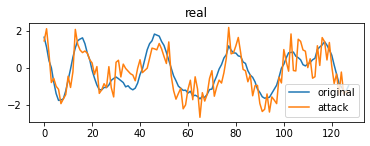

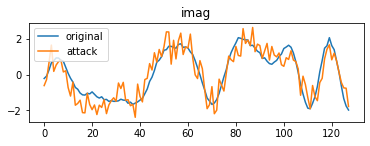

In [ ]:
# 参数的设置问题： assert eps_iter <= eps, (eps_iter, eps)会报错，其中assert函数是判断语句
# BIM aT=e
epsilon_BIM = 1
eps_iter_BIM = 0.1
nb_iter_BIM = 10

adv_example_untargeted_label_BIM = basic_iterative_method(logits_model, original_image, epsilon_BIM, eps_iter_BIM, nb_iter_BIM, norm=np.inf, 
                        targeted=False, rand_minmax=0.3, sanity_checks=True)  # EagerTensor with shape (1, 2, 128)
example_untargeted_pred = model.predict(original_image) 
adv_example_untargeted_label_pred_BIM  = model.predict(adv_example_untargeted_label_BIM )  # ndarray with shape (1, 11) 给出了11个概率
# print(adv_example_untargeted_label.shape)
print(np.argmax(example_untargeted_pred),example_untargeted_pred)
print(np.argmax(adv_example_untargeted_label_pred_BIM ),adv_example_untargeted_label_pred_BIM )

original_image_plt = np.reshape(original_image, (2,128))
real = original_image_plt[0]  #取（2，128）的行
imag = original_image_plt[1]

adv_example_untargeted_label_BIM_plt = np.reshape(adv_example_untargeted_label_BIM , (2,128))
real_adv = adv_example_untargeted_label_BIM_plt[0]  #取（2，128）的行
imag_adv = adv_example_untargeted_label_BIM_plt[1]

plt.figure()
plt.subplot(2,1,1)
plt.plot(real,label='original')
plt.plot(real_adv,label='attack')
plt.title("real")
plt.legend()  #设置 legend 图例
plt.figure()
plt.subplot(2,1,2)
plt.plot(imag,label='original')
plt.plot(imag_adv,label='attack')
plt.title("imag")
plt.legend()  #设置 legend 图例

x1 = original_image_plt
x2_BIM = adv_example_untargeted_label_BIM_plt
x1_2 = x1 - x2_BIM
x1_2_2 = np.multiply(x1_2,x1_2)  # 矩阵对应元素相乘就相当于各个元素平方
x1_2_2_sum = x1_2_2.sum(axis=1)  # axis=1求行和
x1_2_2_sum_chu = x1_2_2_sum / 128
x_sqrt = np.sqrt(x1_2_2_sum_chu)
print(x_sqrt) 


9 [[3.7483239e-01 1.6933845e-18 1.6082339e-12 2.6509045e-03 4.6225668e-07
  8.6250070e-12 4.8586653e-08 4.4870541e-07 3.2270051e-10 6.2251574e-01
  1.0481071e-17]]
0 [[9.6558118e-01 6.7555447e-15 1.3614530e-09 2.6802521e-02 3.4675609e-06
  6.4894694e-09 1.9381231e-07 1.5731199e-07 1.3978981e-08 7.6124938e-03
  3.0756732e-14]]
[0.8529361  0.83422863]


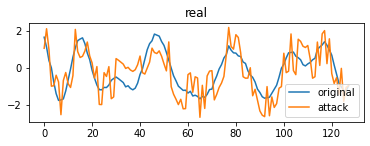

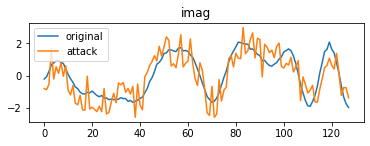

In [ ]:
from cleverhans.future.tf2.attacks import momentum_iterative_method
adv_example_untargeted_label_MI = momentum_iterative_method(logits_model, original_image, eps=1, eps_iter=0.1, nb_iter=10, norm=np.inf,
                               clip_min=None, clip_max=None, y=None, targeted=False,
                               decay_factor=1.0, sanity_checks=True)
example_untargeted_pred = model.predict(original_image) 
adv_example_untargeted_label_pred_MI = model.predict(adv_example_untargeted_label_MI)  # ndarray with shape (1, 11) 给出了11个概率
# print(adv_example_untargeted_label.shape)
print(np.argmax(example_untargeted_pred),example_untargeted_pred)
print(np.argmax(adv_example_untargeted_label_pred_MI),adv_example_untargeted_label_pred_MI)

original_image_plt = np.reshape(original_image, (2,128))
real = original_image_plt[0]  #取（2，128）的行
imag = original_image_plt[1]

adv_example_untargeted_label_MI_plt = np.reshape(adv_example_untargeted_label_MI , (2,128))
real_adv = adv_example_untargeted_label_MI_plt[0]  #取（2，128）的行
imag_adv = adv_example_untargeted_label_MI_plt[1]

plt.figure()
plt.subplot(2,1,1)
plt.plot(real,label='original')
plt.plot(real_adv,label='attack')
plt.title("real")
plt.legend()  #设置 legend 图例
plt.figure()
plt.subplot(2,1,2)
plt.plot(imag,label='original')
plt.plot(imag_adv,label='attack')
plt.title("imag")
plt.legend()  #设置 legend 图例

x1 = original_image_plt
x2_MI = adv_example_untargeted_label_MI_plt
# print(x1,x2)
x1_2 = x1 - x2_MI
# print(x1_2)
x1_2_2 = np.multiply(x1_2,x1_2)  # 矩阵对应元素相乘就相当于各个元素平方
# print(x1_2_2.shape)
x1_2_2_sum = x1_2_2.sum(axis=1)  # axis=1求行和
x1_2_2_sum_chu = x1_2_2_sum / 128
# print(x1_2_2_sum,x1_2_2_sum_chu)
# print(x1_2_sum,abs(x1_2_sum))
x_sqrt = np.sqrt(x1_2_2_sum_chu)
print(x_sqrt) 

In [ ]:
# x1 = original_image_plt
# x2 = adv_example_untargeted_label_plt
# x1_2 = x1 - x2
# x1_2_sum = x1_2.sum(axis=1)/128
# print(x1_2_sum,abs(x1_2_sum))
# x_sqrt = np.sqrt(abs(x1_2_sum))
# print(x_sqrt) 